# Exploracion de los datos caso Contugas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [6]:
proyect_dir = os.path.dirname(os.path.abspath(os.getcwd()))

In [13]:
dir = "data\Datos.xlsx"
dir_data = os.path.join(proyect_dir,dir)
print(dir_data)

df = pd.read_excel(dir_data, sheet_name=None)

df_total = pd.concat(
    [df.assign(cliente=key) for key, df in df.items()],
    ignore_index=True
)

dir_salida = "data\datos_unidos.csv"
df_total.to_csv(os.path.join(proyect_dir,dir_salida), index=False)

c:\Users\Paul\Documents\Paul\Cursos\Uniandes\maestria_MIAD\202501\proyecto_final\data\Datos.xlsx


In [18]:
dir_salida = "data\datos_sample_158.csv"
df_total[df_total["cliente"].isin(["CLIENTE1","CLIENTE5","CLIENTE8"])].to_csv(os.path.join(proyect_dir,dir_salida), index=False)

Text(0.5, 1.0, 'cantidad de columnas por cliente')

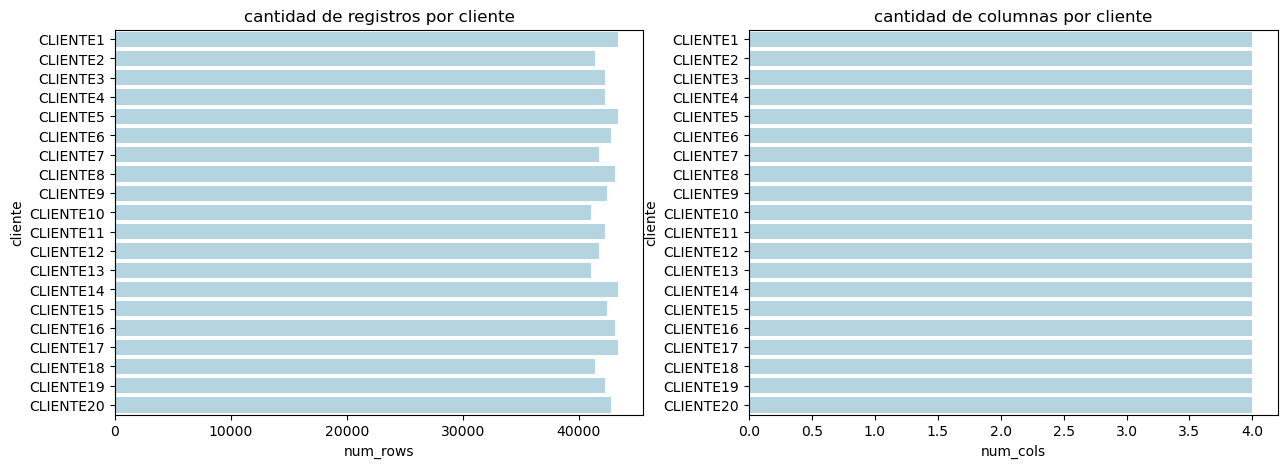

In [19]:
# valida que cada cliente tenga datos
arr_cliente = []
arr_num_rows = []
arr_num_cols = []
for k,v in df.items():
    arr_cliente.append(k)
    arr_num_rows.append(v.shape[0])
    arr_num_cols.append(v.shape[1])

df_desc_num_rows_cols = pd.DataFrame({"cliente":arr_cliente,
              "num_rows":arr_num_rows,
              "num_cols":arr_num_cols
              })

fig, ax = plt.subplots(1,2, figsize=(15,5))
axs = ax.flatten()
sns.barplot(df_desc_num_rows_cols, y="cliente", x="num_rows", color="lightblue", ax = ax[0])
sns.barplot(df_desc_num_rows_cols, y="cliente", x="num_cols", color="lightblue", ax = ax[1])
axs[0].set_title("cantidad de registros por cliente")
axs[1].set_title("cantidad de columnas por cliente")

## Formato de los datos

In [20]:
df_total.dtypes

Fecha          datetime64[ns]
Presion               float64
Temperatura           float64
Volumen               float64
cliente                object
dtype: object

## Estadisticas Descriptivas

In [21]:
# valida que cada cliente tenga datos
arr_cliente = []
arr_min_fecha = []
arr_max_fecha = []

arr_min_presion = []
arr_max_presion = []

arr_min_temperatura = []
arr_max_temperatura = []

arr_min_volumen = []
arr_max_volumen = []

for k,v in df.items():
    arr_cliente.append(k)

    arr_min_fecha.append(v.describe().loc["min","Fecha"])
    arr_max_fecha.append(v.describe().loc["max","Fecha"])

    arr_min_presion.append(v.describe().loc["min","Presion"])
    arr_max_presion.append(v.describe().loc["max","Presion"])

    arr_min_temperatura.append(v.describe().loc["min","Temperatura"])
    arr_max_temperatura.append(v.describe().loc["max","Temperatura"])

    arr_min_volumen.append(v.describe().loc["min","Volumen"])
    arr_max_volumen.append(v.describe().loc["max","Volumen"])

df_desc = pd.DataFrame({"cliente": arr_cliente,
                                      "min_fecha": arr_min_fecha,
                                      "max_fecha": arr_max_fecha,
                                      "min_presion":arr_min_presion,
                                      "max_presion":arr_max_presion,
                                      "min_temperatura":arr_min_temperatura,
                                      "max_temperatura":arr_max_temperatura,
                                      "min_volumen":arr_min_volumen,
                                      "max_volumen":arr_max_volumen
                                    })

df_desc

,cliente,min_fecha,max_fecha,min_presion,max_presion,min_temperatura,max_temperatura,min_volumen,max_volumen
0,CLIENTE1,2019-01-14,2023-12-31 23:00:00,15.742337,18.074274,15.401803,32.869112,0.0,65.936644
1,CLIENTE2,2019-01-14,2023-12-31 23:00:00,16.129015,18.106402,17.884059,35.208346,0.0,517.564868
2,CLIENTE3,2019-01-14,2023-12-31 23:00:00,3.057171,4.037030,14.933032,34.009233,0.0,356.724008
3,CLIENTE4,2019-01-14,2023-12-31 23:00:00,15.214996,20.112931,12.711813,36.897044,0.0,363.009776
4,CLIENTE5,2019-01-14,2023-12-31 23:00:00,14.489896,19.009352,10.500638,41.762232,0.0,89.245051
5,CLIENTE6,2019-01-14,2023-12-31 23:00:00,13.810026,19.720870,14.157366,34.186338,0.0,366.656382
6,CLIENTE7,2019-01-14,2023-12-31 23:00:00,14.418261,20.307852,0.433436,39.982239,0.0,175.763858
7,CLIENTE8,2019-01-14,2023-12-31 23:00:00,14.996490,18.950955,14.838703,37.368959,0.0,522.780891
8,CLIENTE9,2019-01-14,2023-12-31 23:00:00,16.486477,18.430469,11.820104,31.783964,0.0,366.016120
9,CLIENTE10,2019-01-14,2023-12-31 23:00:00,16.469864,18.573079,14.291032,35.069721,0.0,247.072990


In [22]:
def plot_rango_var(col):
    fig, ax = plt.subplots(1,2, figsize=(15,5))
    axs = ax.flatten()
    sns.barplot(df_desc, y="cliente", x="min_{c}".format(c=col), color="lightblue", ax = ax[0])
    sns.barplot(df_desc, y="cliente", x="max_{c}".format(c=col), color="lightblue", ax = ax[1])
    axs[0].set_title("valor minimo de la variable {c}".format(c=col))
    axs[1].set_title("valor maximo de la variable {c}".format(c=col))

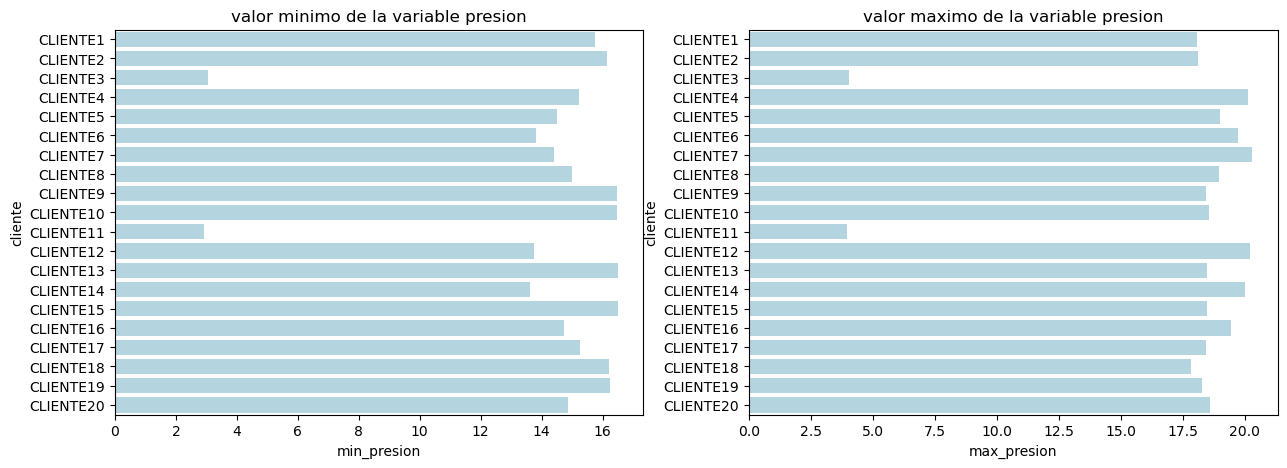

In [23]:
plot_rango_var("presion")

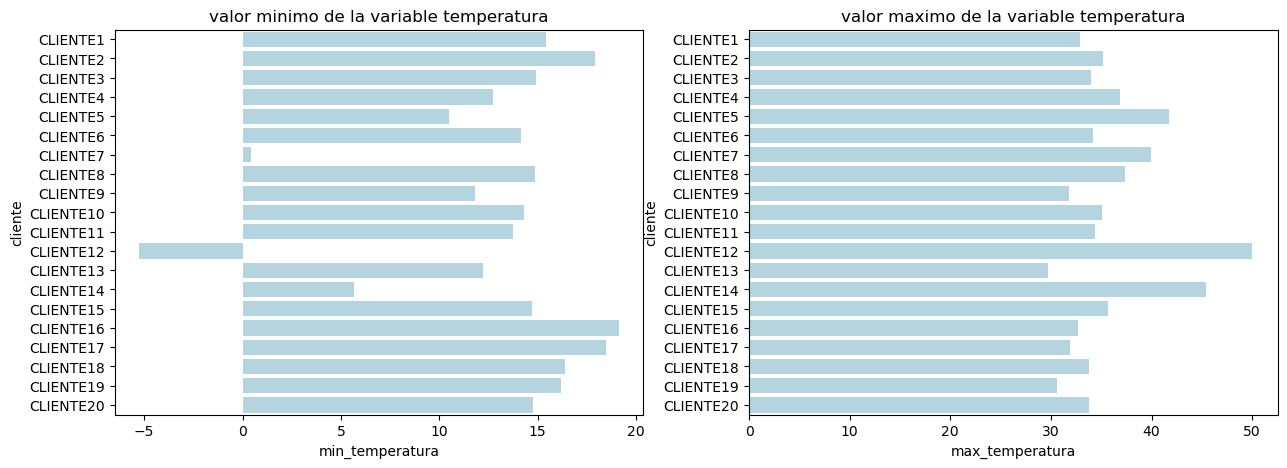

In [24]:
plot_rango_var("temperatura")

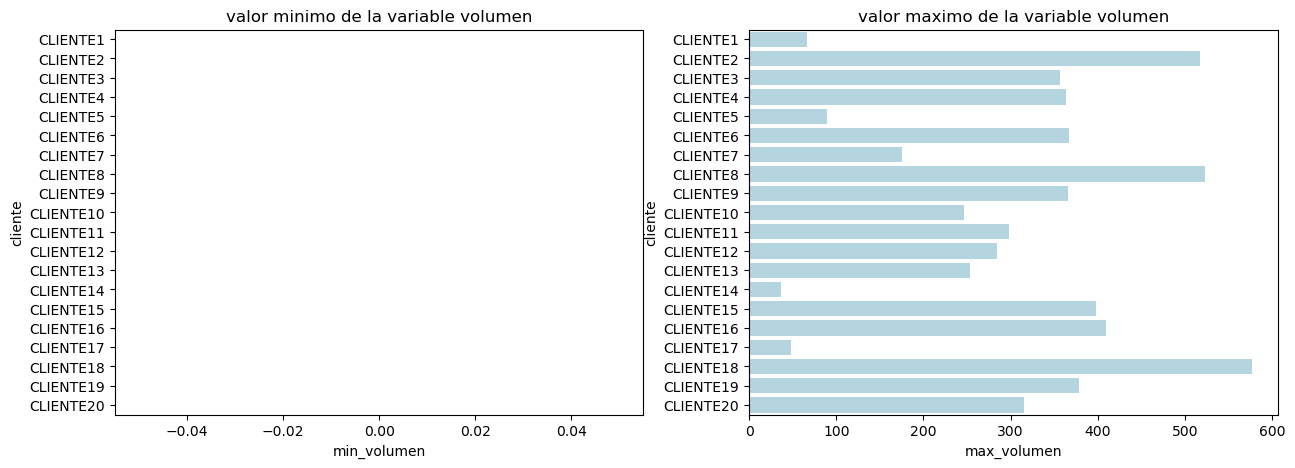

In [25]:
plot_rango_var("volumen")

## Test de campos nulos

se evidencia que todos los campos tienen un valor para todos los clientes

In [26]:
df_total.isna().sum()

Fecha          0
Presion        0
Temperatura    0
Volumen        0
cliente        0
dtype: int64

## Estadisticas basicas de los datos

### Variable Fecha

se evidencia que para todos los clientes se tiene informacion desde **2019-01-14** hasta **2023-12-31** por las 24h desde las 00:00:00 hasta las 23:00:00

In [27]:
df_total['date'] = df_total['Fecha'].dt.date  # Extract the date
df_total['time'] = df_total['Fecha'].dt.time  # Extract the time

In [28]:
cols_cliente = [
"CLIENTE1",
"CLIENTE2",
"CLIENTE3",
"CLIENTE4",
"CLIENTE5",
"CLIENTE6",
"CLIENTE7",
"CLIENTE8",
"CLIENTE9",
"CLIENTE10",
"CLIENTE11",
"CLIENTE12",
"CLIENTE13",
"CLIENTE14",
"CLIENTE15",
"CLIENTE16",
"CLIENTE17",
"CLIENTE18",
"CLIENTE19",
"CLIENTE20",
]
df_total.groupby(["cliente"]).agg({"date":["min","max"], "time":["min","max"]}).loc[cols_cliente,:]

date                  time          
                  min         max       min       max
cliente                                              
CLIENTE1   2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE2   2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE3   2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE4   2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE5   2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE6   2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE7   2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE8   2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE9   2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE10  2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE11  2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE12  2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE13  2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE14  2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE15  2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE16  2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE17  2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE18  2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE19  2019-01-14  2023-12-31  00:00:00  23:00:00
CLIENTE20  2019-01-14  2023-12-31  00:00:00  23:00:00

### Valores faltantes de fechas

In [29]:
df_fechas_clientes = df_total.groupby(["Fecha","cliente"])[["Presion"]].count().reset_index().pivot(columns="cliente",index="Fecha",values="Presion")

In [30]:
# Generate un dataframe que tiene las fechas desde incio a fin con intervalos de 1-hour intervals
start_date = "2019-02-14 00:00:00"
end_date = "2023-12-31 23:00:00"

datetime_list = pd.date_range(start=start_date, end=end_date, freq='h').to_list()
df_datetime_list = pd.DataFrame(datetime_list ,columns=["Fecha"])

In [31]:
# Crea dataframe con todos los periodos de tiempo y adjunta la informacion de Presion (para determinar en que periodos si existen datos y en cuales no)
df_fecha_total = pd.merge(df_datetime_list,df_fechas_clientes, on="Fecha")
df_fecha_total.set_index("Fecha", inplace=True)

En el siguiente dataframe para cada cliente se determina la cantidad de horas del total que tienen datos nulos

In [32]:
# Crea un dataframe que indica si en el periodo de tiempo existe o no el dato, para cada cliente (columna)
df_fecha_null = df_fecha_total.isna()
df_descr_fecha_null = pd.DataFrame(df_fecha_null.sum(), columns=["cant_nulls"])
df_descr_fecha_null["pct"] = (100*df_descr_fecha_null["cant_nulls"]/df_fecha_null.shape[0]).round(1)
df_descr_fecha_null

,cant_nulls,pct
CLIENTE1,99,0.2
CLIENTE10,2453,5.7
CLIENTE11,1264,3.0
CLIENTE12,1735,4.1
CLIENTE13,2453,5.7
CLIENTE14,97,0.2
CLIENTE15,1084,2.5
CLIENTE16,364,0.9
CLIENTE17,99,0.2
CLIENTE18,2134,5.0


Text(0.5, 1.0, 'porcentaje de unidades de tiempo sin datos del total de fechas posibles')

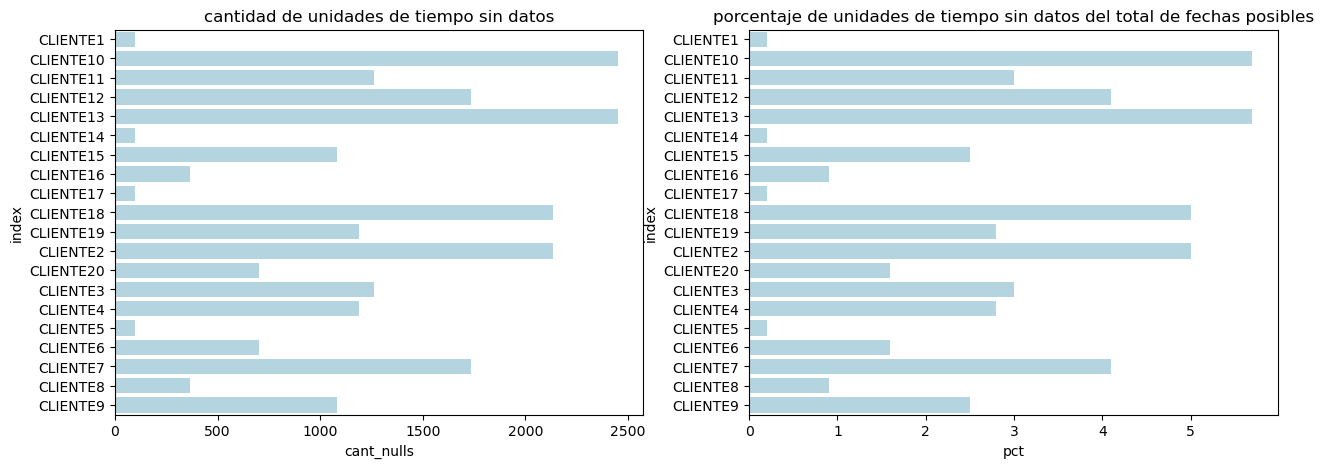

In [33]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
axs = ax.flatten()
sns.barplot(df_descr_fecha_null.reset_index(), y="index",x="cant_nulls", color="lightblue", ax = ax[0])
sns.barplot(df_descr_fecha_null.reset_index(), y="index",x="pct", color="lightblue", ax = ax[1])
axs[0].set_title("cantidad de unidades de tiempo sin datos")
axs[1].set_title("porcentaje de unidades de tiempo sin datos del total de fechas posibles")


Heatmap para cada cliente en donde se peude ver como estan ditribuidas en el tiempo esos valores faltantes

<Axes: ylabel='Fecha'>

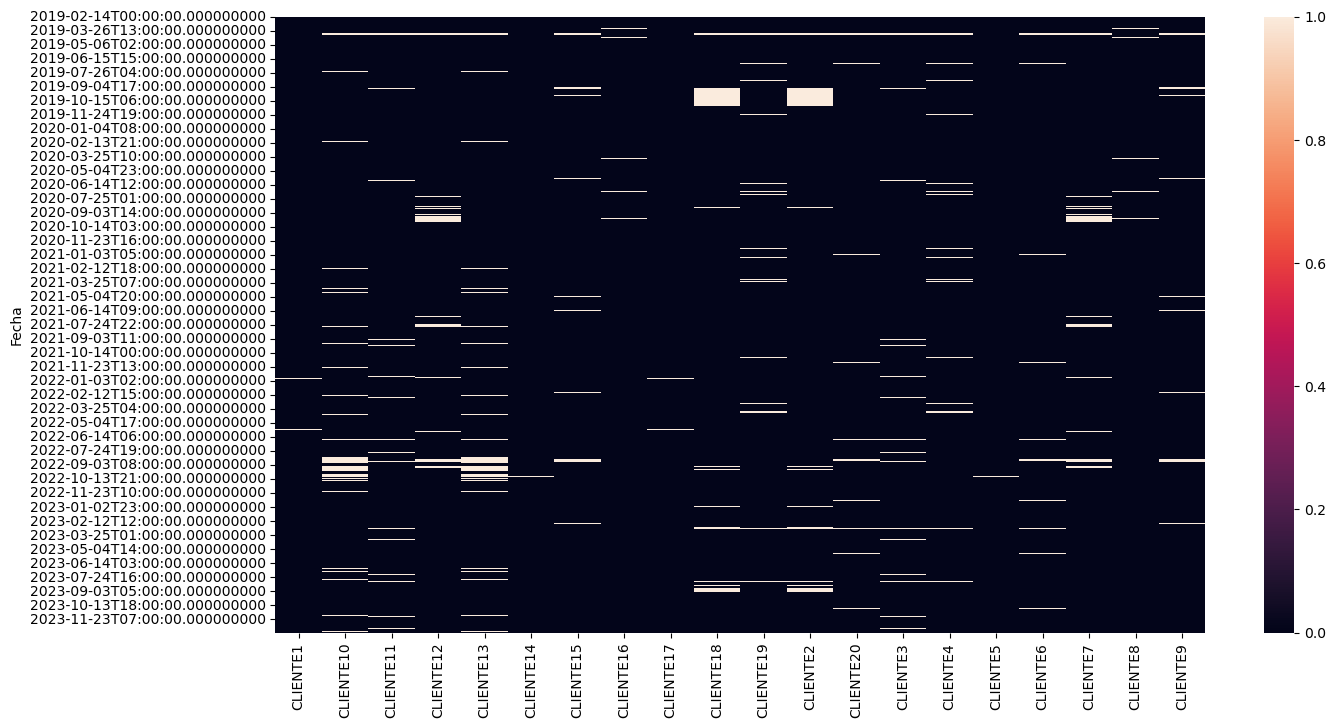

In [34]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df_fecha_null)

Analisis de periodos de tiempo nulos agrupado por dias 

In [19]:
df_fecha_null_dias = df_fecha_null.reset_index()

df_fecha_null_dias['date'] = df_fecha_null_dias['Fecha'].dt.date  # Extract the date
df_fecha_null_dias['time'] = df_fecha_null_dias['Fecha'].dt.time  # Extract the time
df_fecha_null_dias = df_fecha_null_dias.drop(columns=["Fecha","time"]).groupby(["date"]).sum().reset_index()
df_fecha_null_dias = df_fecha_null_dias.melt(id_vars=["date"], var_name="cliente", value_name="cant_nulls")

c = df_fecha_null_dias["cant_nulls"] > 0
print("cantidad total de horas con valores nulos {}".format(df_fecha_null_dias["cant_nulls"].sum()))
df_fecha_null_dias[c].describe()

cantidad total de horas con valores nulos 22248


,cant_nulls
count,3780.000000
mean,5.885714
std,7.437534
min,1.000000
25%,1.000000
50%,1.000000
75%,10.000000
max,24.000000


In [20]:
# porcentaje de horas por dia con periodos faltantes
gr_fecha_null_dias = df_fecha_null_dias[c].groupby("cant_nulls")[["date"]].count()
gr_fecha_null_dias["pct"] = (100*gr_fecha_null_dias[["date"]]/df_fecha_null_dias[c].shape[0]).round(1)
gr_fecha_null_dias

,date,pct
cant_nulls,,
1,1984,52.5
2,258,6.8
3,118,3.1
4,66,1.7
5,74,2.0
6,54,1.4
7,72,1.9
8,78,2.1
9,60,1.6


c:\Users\Paul\anaconda3\envs\tf-gpu2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='cant_nulls', ylabel='Count'>

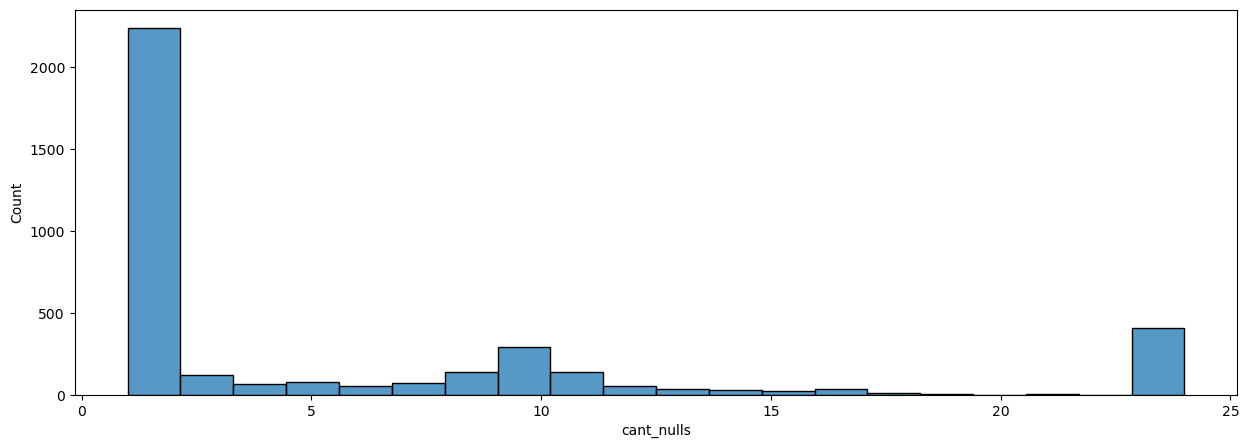

In [21]:
fig, ax = plt.subplots(figsize=(15,5))
sns.histplot(df_fecha_null_dias.loc[c,"cant_nulls"])

Analisis de periodos de tiempo faltantes, determinar si son horas aisladas

In [22]:
df_fecha_null_horas_aisladas = df_fecha_null.copy()

cols_missing = []


for x in cols_cliente:
    cols_missing.append("missing_{}".format(x))
    # Check for rows that are isolated missing values (not consecutive)
    df_fecha_null_horas_aisladas['prev_missing'] = df_fecha_null_horas_aisladas[x].shift(1, fill_value=False)  # Missing value in the previous row
    df_fecha_null_horas_aisladas['next_missing'] = df_fecha_null_horas_aisladas[x].shift(-1, fill_value=False)  # Missing value in the next row

    # Isolated missing values occur when both prev_missing and next_missing are False
    df_fecha_null_horas_aisladas["missing_{}".format(x)] = df_fecha_null_horas_aisladas[x] & ~df_fecha_null_horas_aisladas['prev_missing'] & ~df_fecha_null_horas_aisladas['next_missing']

In [23]:
print("cantidad total de periodos de tiempo sin valores")
df_fecha_null[cols_cliente].sum()

cantidad total de periodos de tiempo sin valores


CLIENTE1       99
CLIENTE2     2134
CLIENTE3     1264
CLIENTE4     1190
CLIENTE5       97
CLIENTE6      704
CLIENTE7     1735
CLIENTE8      364
CLIENTE9     1084
CLIENTE10    2453
CLIENTE11    1264
CLIENTE12    1735
CLIENTE13    2453
CLIENTE14      97
CLIENTE15    1084
CLIENTE16     364
CLIENTE17      99
CLIENTE18    2134
CLIENTE19    1190
CLIENTE20     704
dtype: int64

In [24]:
print("cantidad total de periodos de tiempo aislados - es decir solo 1 hora faltante")
df_fecha_null_horas_aisladas[cols_missing].sum().sum()

cantidad total de periodos de tiempo aislados - es decir solo 1 hora faltante


2376

## Correlacion

In [25]:
arr_cliente = []

for k,v in df.items():
    arr_cliente.append(k)

    display(v.corr())

,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.516769,0.000249,0.057248
Presion,-0.516769,1.000000,-0.047996,-0.002282
Temperatura,0.000249,-0.047996,1.000000,0.280288
Volumen,0.057248,-0.002282,0.280288,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.582298,-0.089185,0.127304
Presion,-0.582298,1.000000,0.063640,0.024041
Temperatura,-0.089185,0.063640,1.000000,-0.047198
Volumen,0.127304,0.024041,-0.047198,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.278882,0.160139,0.497484
Presion,-0.278882,1.000000,0.093260,-0.581275
Temperatura,0.160139,0.093260,1.000000,-0.136022
Volumen,0.497484,-0.581275,-0.136022,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.602474,-0.010275,-0.036323
Presion,-0.602474,1.000000,-0.082990,0.009146
Temperatura,-0.010275,-0.082990,1.000000,-0.019658
Volumen,-0.036323,0.009146,-0.019658,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.563654,0.059927,0.451895
Presion,-0.563654,1.000000,-0.093551,-0.382353
Temperatura,0.059927,-0.093551,1.000000,0.365965
Volumen,0.451895,-0.382353,0.365965,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.611697,-0.029755,0.190974
Presion,-0.611697,1.000000,-0.021103,-0.171633
Temperatura,-0.029755,-0.021103,1.000000,0.334344
Volumen,0.190974,-0.171633,0.334344,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.206641,0.049304,0.104429
Presion,-0.206641,1.000000,-0.383563,-0.349134
Temperatura,0.049304,-0.383563,1.000000,0.735402
Volumen,0.104429,-0.349134,0.735402,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.241600,-0.235099,-0.044662
Presion,-0.241600,1.000000,-0.497768,-0.881600
Temperatura,-0.235099,-0.497768,1.000000,0.525602
Volumen,-0.044662,-0.881600,0.525602,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.115218,-0.006069,-0.013055
Presion,-0.115218,1.000000,0.017969,-0.690166
Temperatura,-0.006069,0.017969,1.000000,0.060426
Volumen,-0.013055,-0.690166,0.060426,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.024731,-0.056716,-0.012553
Presion,-0.024731,1.000000,0.170611,-0.529623
Temperatura,-0.056716,0.170611,1.000000,-0.022519
Volumen,-0.012553,-0.529623,-0.022519,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.062566,0.177793,0.173482
Presion,-0.062566,1.000000,0.131980,-0.610483
Temperatura,0.177793,0.131980,1.000000,-0.132636
Volumen,0.173482,-0.610483,-0.132636,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.265202,0.069518,0.122995
Presion,-0.265202,1.000000,-0.351330,-0.358849
Temperatura,0.069518,-0.351330,1.000000,0.776739
Volumen,0.122995,-0.358849,0.776739,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,0.143177,-0.043727,0.047237
Presion,0.143177,1.000000,0.222848,-0.559701
Temperatura,-0.043727,0.222848,1.000000,-0.055341
Volumen,0.047237,-0.559701,-0.055341,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.521914,0.068240,0.584641
Presion,-0.521914,1.000000,-0.100571,-0.447156
Temperatura,0.068240,-0.100571,1.000000,0.299668
Volumen,0.584641,-0.447156,0.299668,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.001137,-0.004599,0.043724
Presion,-0.001137,1.000000,0.048946,-0.769150
Temperatura,-0.004599,0.048946,1.000000,0.003084
Volumen,0.043724,-0.769150,0.003084,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.309154,-0.185119,-0.048619
Presion,-0.309154,1.000000,-0.446146,-0.827919
Temperatura,-0.185119,-0.446146,1.000000,0.531643
Volumen,-0.048619,-0.827919,0.531643,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.508221,-0.106489,-0.009547
Presion,-0.508221,1.000000,0.008230,0.012304
Temperatura,-0.106489,0.008230,1.000000,0.121682
Volumen,-0.009547,0.012304,0.121682,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.555944,-0.081476,0.121303
Presion,-0.555944,1.000000,0.037942,0.033047
Temperatura,-0.081476,0.037942,1.000000,-0.015699
Volumen,0.121303,0.033047,-0.015699,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.587433,0.002499,0.017143
Presion,-0.587433,1.000000,-0.087910,-0.024714
Temperatura,0.002499,-0.087910,1.000000,0.015440
Volumen,0.017143,-0.024714,0.015440,1.000000


,Fecha,Presion,Temperatura,Volumen
Fecha,1.000000,-0.561541,-0.038840,0.041554
Presion,-0.561541,1.000000,0.002765,-0.048987
Temperatura,-0.038840,0.002765,1.000000,0.364365
Volumen,0.041554,-0.048987,0.364365,1.000000


# series de tiempo - completas

In [26]:
start_date = "2019-02-14 00:00:00"
end_date = "2023-12-31 23:00:00"

datetime_list = pd.date_range(start=start_date, end=end_date, freq='h').to_list()
df_datetime_list = pd.DataFrame(datetime_list ,columns=["Fecha"])

In [27]:
def describe_variable(variable):

    df_presion = df_total.groupby(["Fecha","cliente"])[[variable]].sum().reset_index().pivot(columns="cliente",index="Fecha",values=variable)

    df_total_fecha_presion = pd.merge(df_datetime_list,df_presion, on="Fecha")

    n_cols = 2
    n_rows = int(np.ceil(len(cols_cliente)/n_cols))

    fig, ax = plt.subplots(n_rows,n_cols, figsize=(n_cols*10, n_rows*5))
    axs = ax.flatten()

    for i, c in enumerate(cols_cliente):
        
        sns.lineplot(df_total_fecha_presion[c], ax=axs[i])
        axs[i].set_title("serie de tiempo de {var} para el {c}".format(var=variable, c=c))

c:\Users\Paul\anaconda3\envs\tf-gpu2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paul\anaconda3\envs\tf-gpu2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paul\anaconda3\envs\tf-gpu2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paul\anaconda3\envs\tf-gpu2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

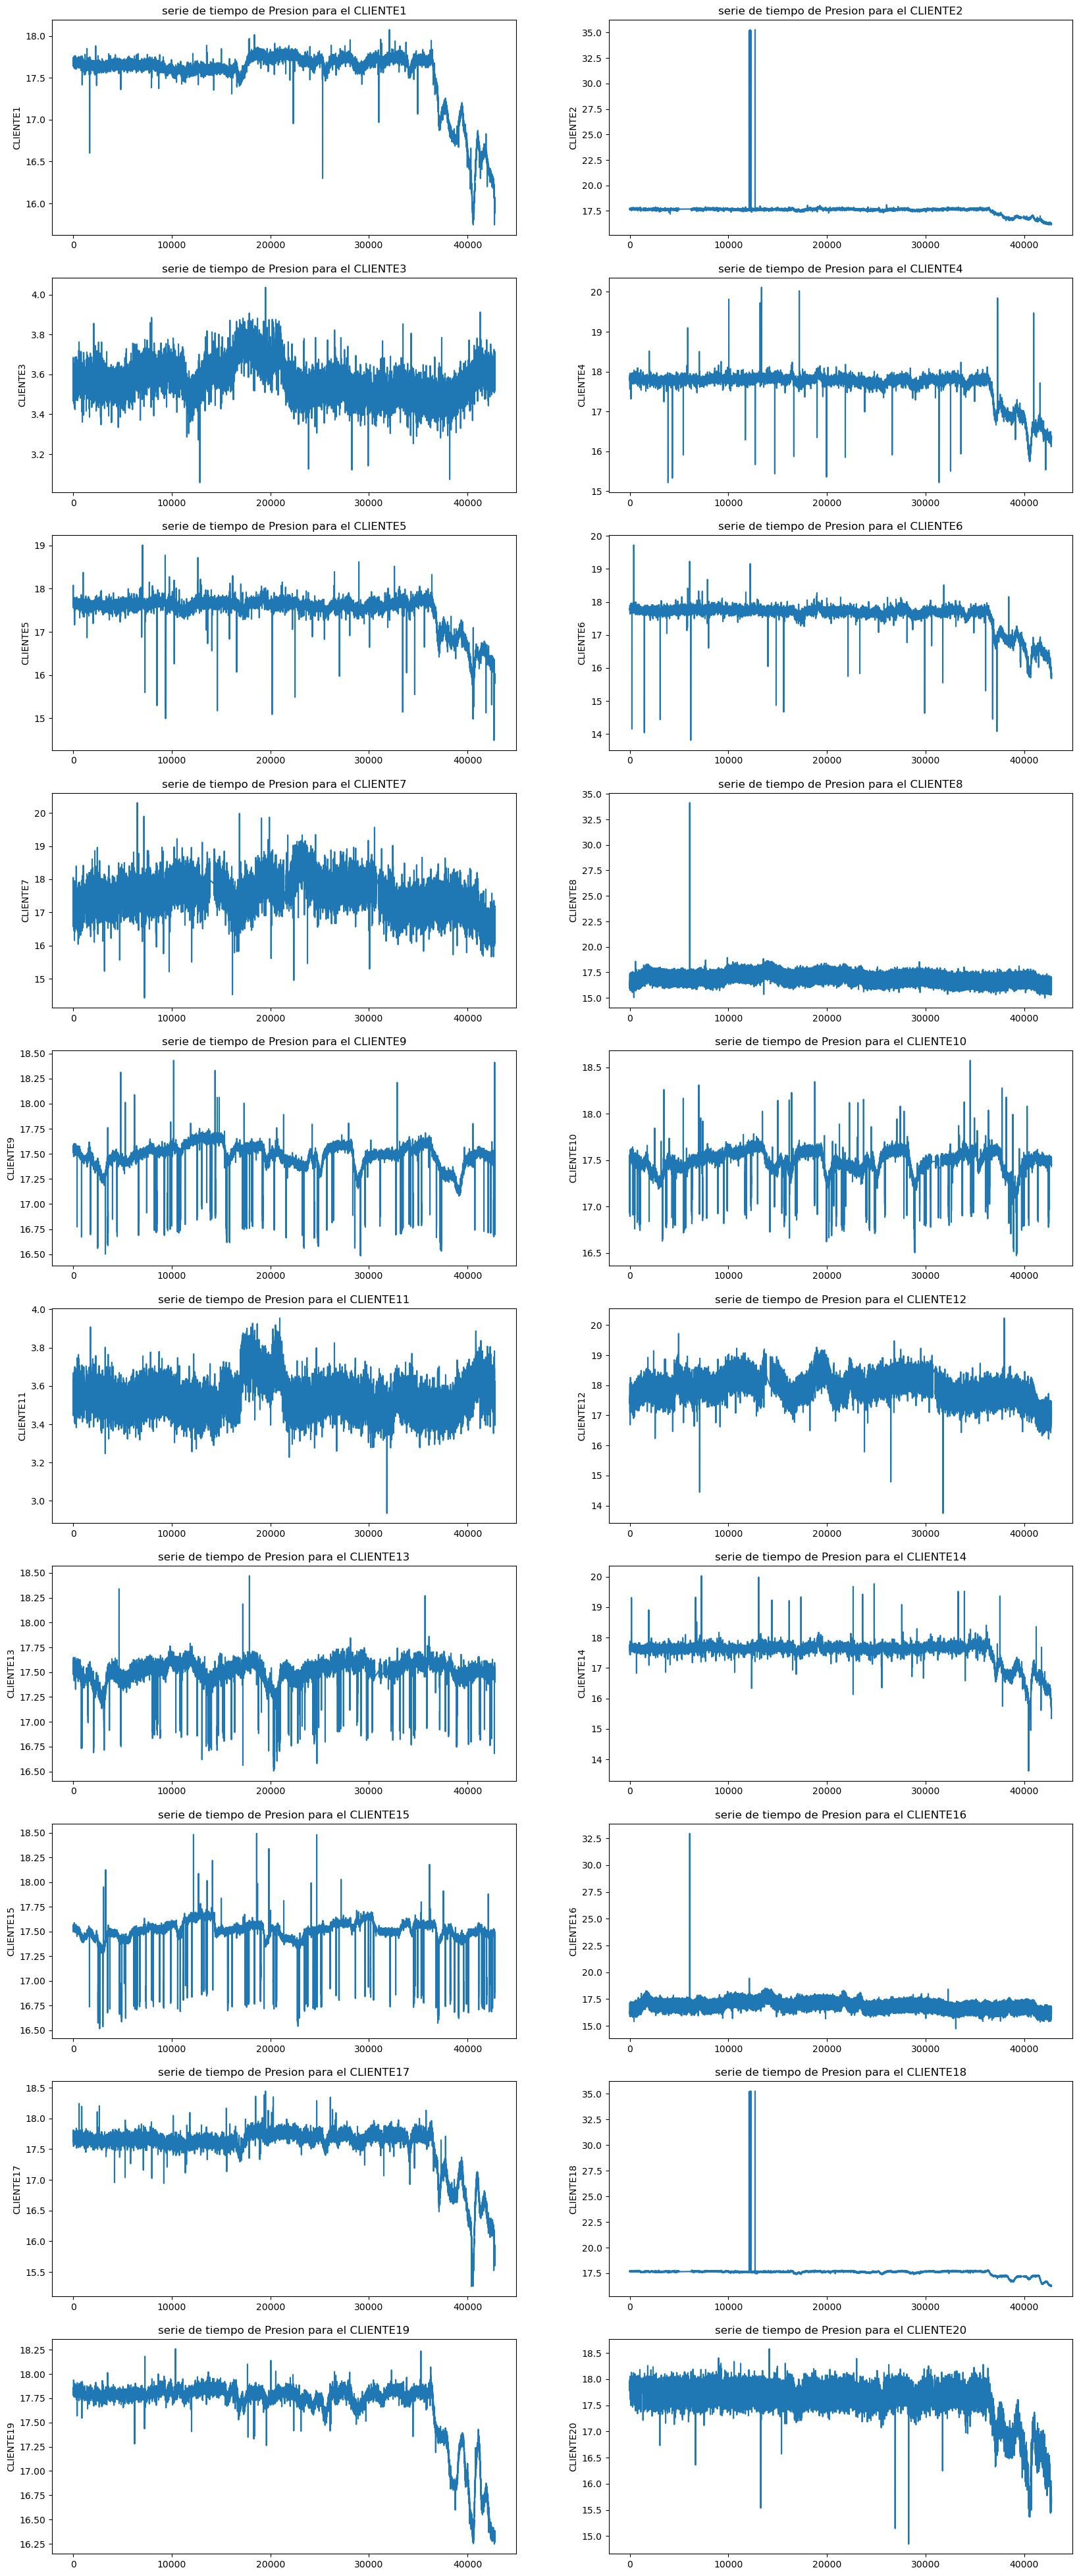

In [28]:
describe_variable("Presion")

c:\Users\Paul\anaconda3\envs\tf-gpu2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paul\anaconda3\envs\tf-gpu2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paul\anaconda3\envs\tf-gpu2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paul\anaconda3\envs\tf-gpu2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

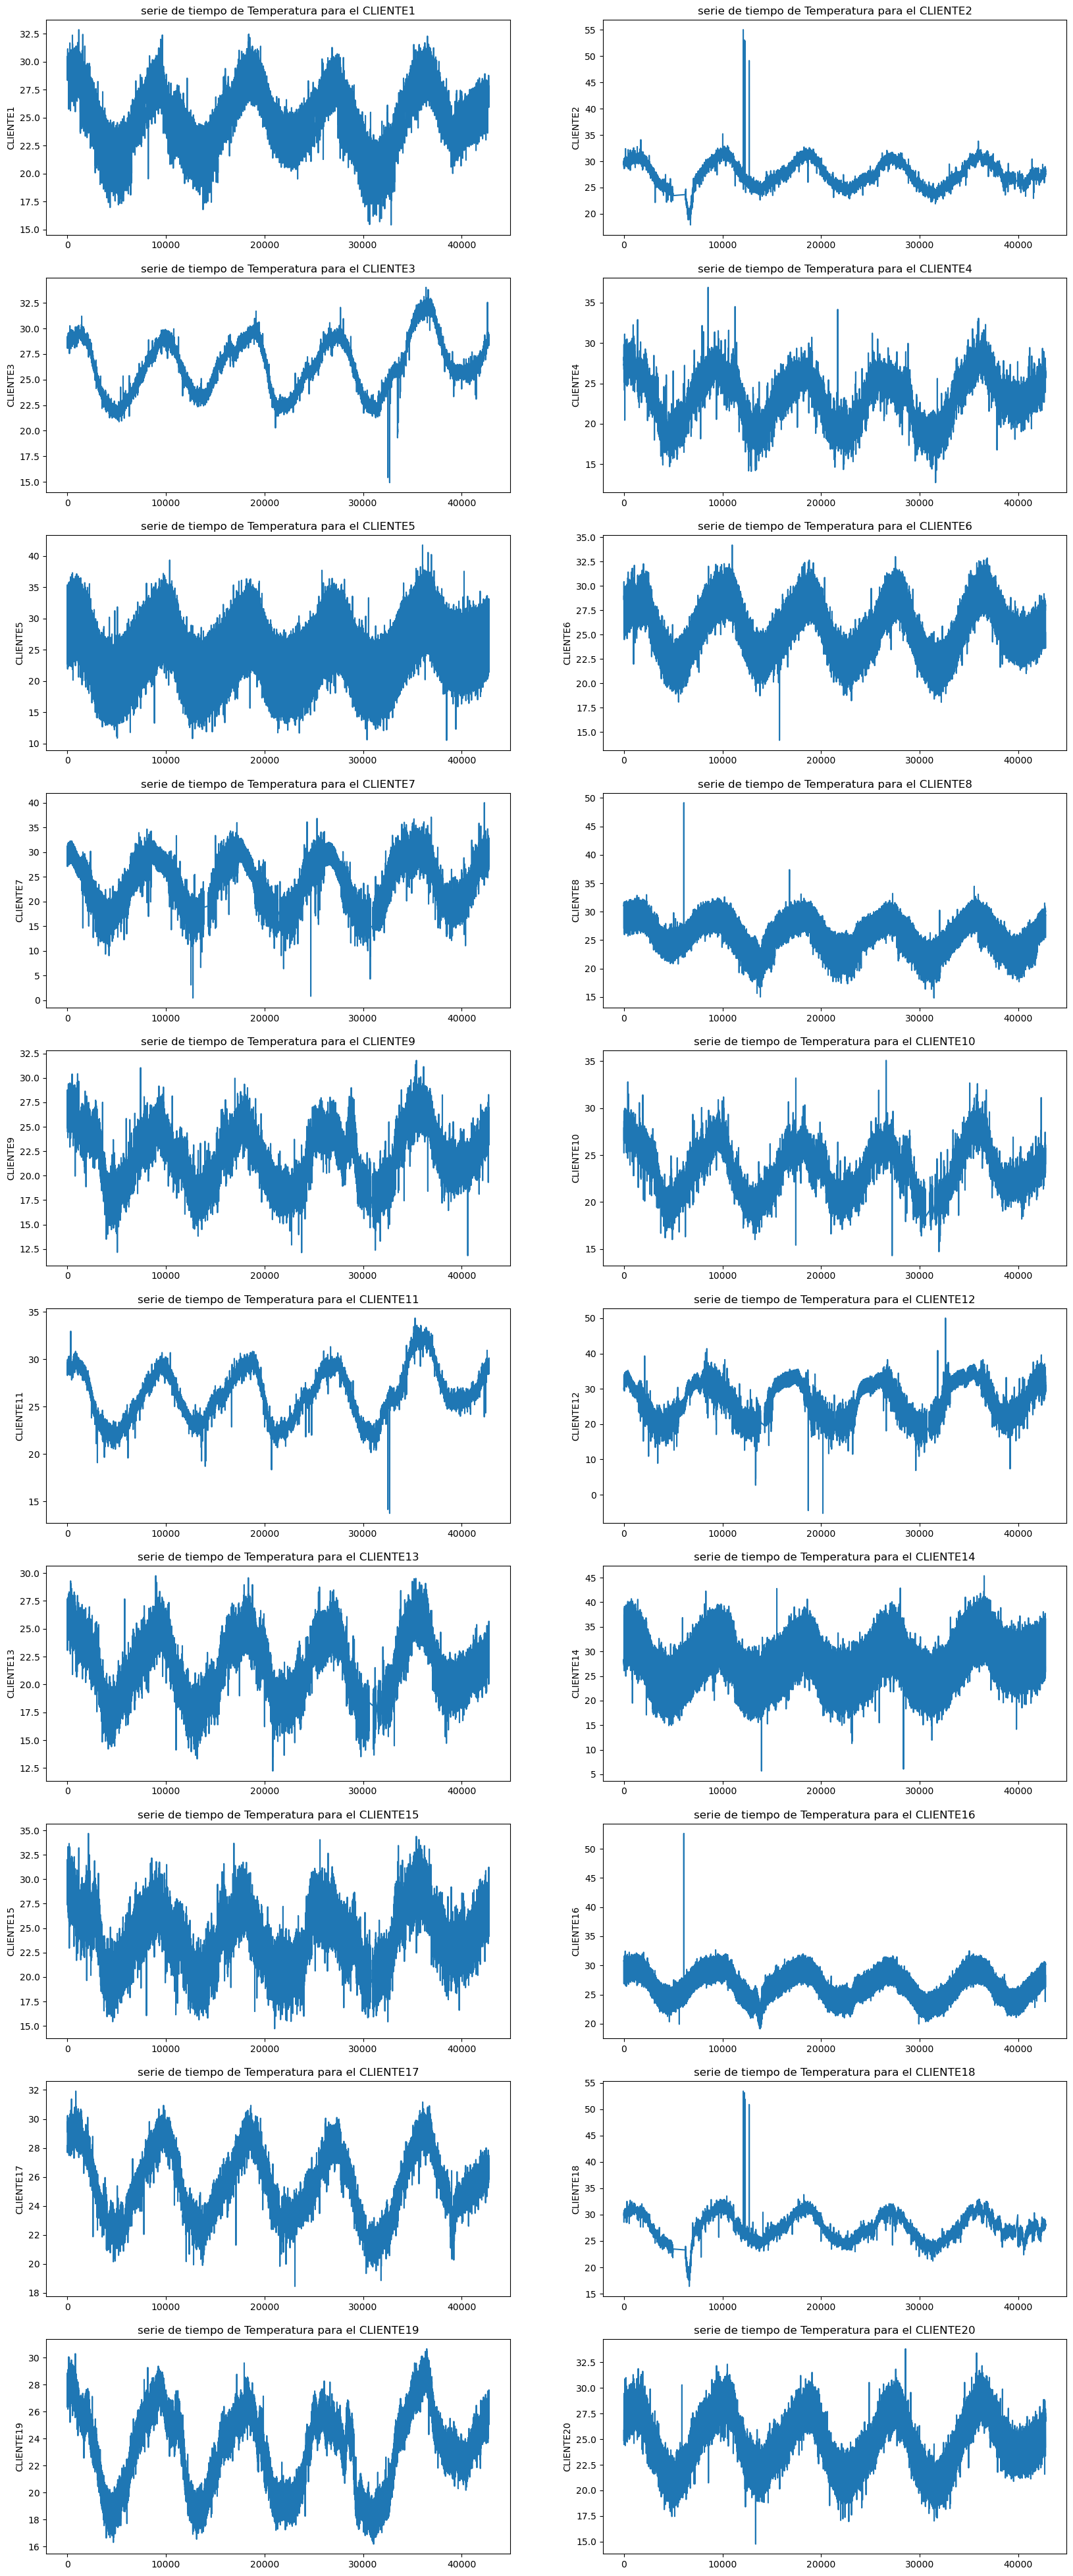

In [29]:
describe_variable("Temperatura")

c:\Users\Paul\anaconda3\envs\tf-gpu2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paul\anaconda3\envs\tf-gpu2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paul\anaconda3\envs\tf-gpu2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Paul\anaconda3\envs\tf-gpu2\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

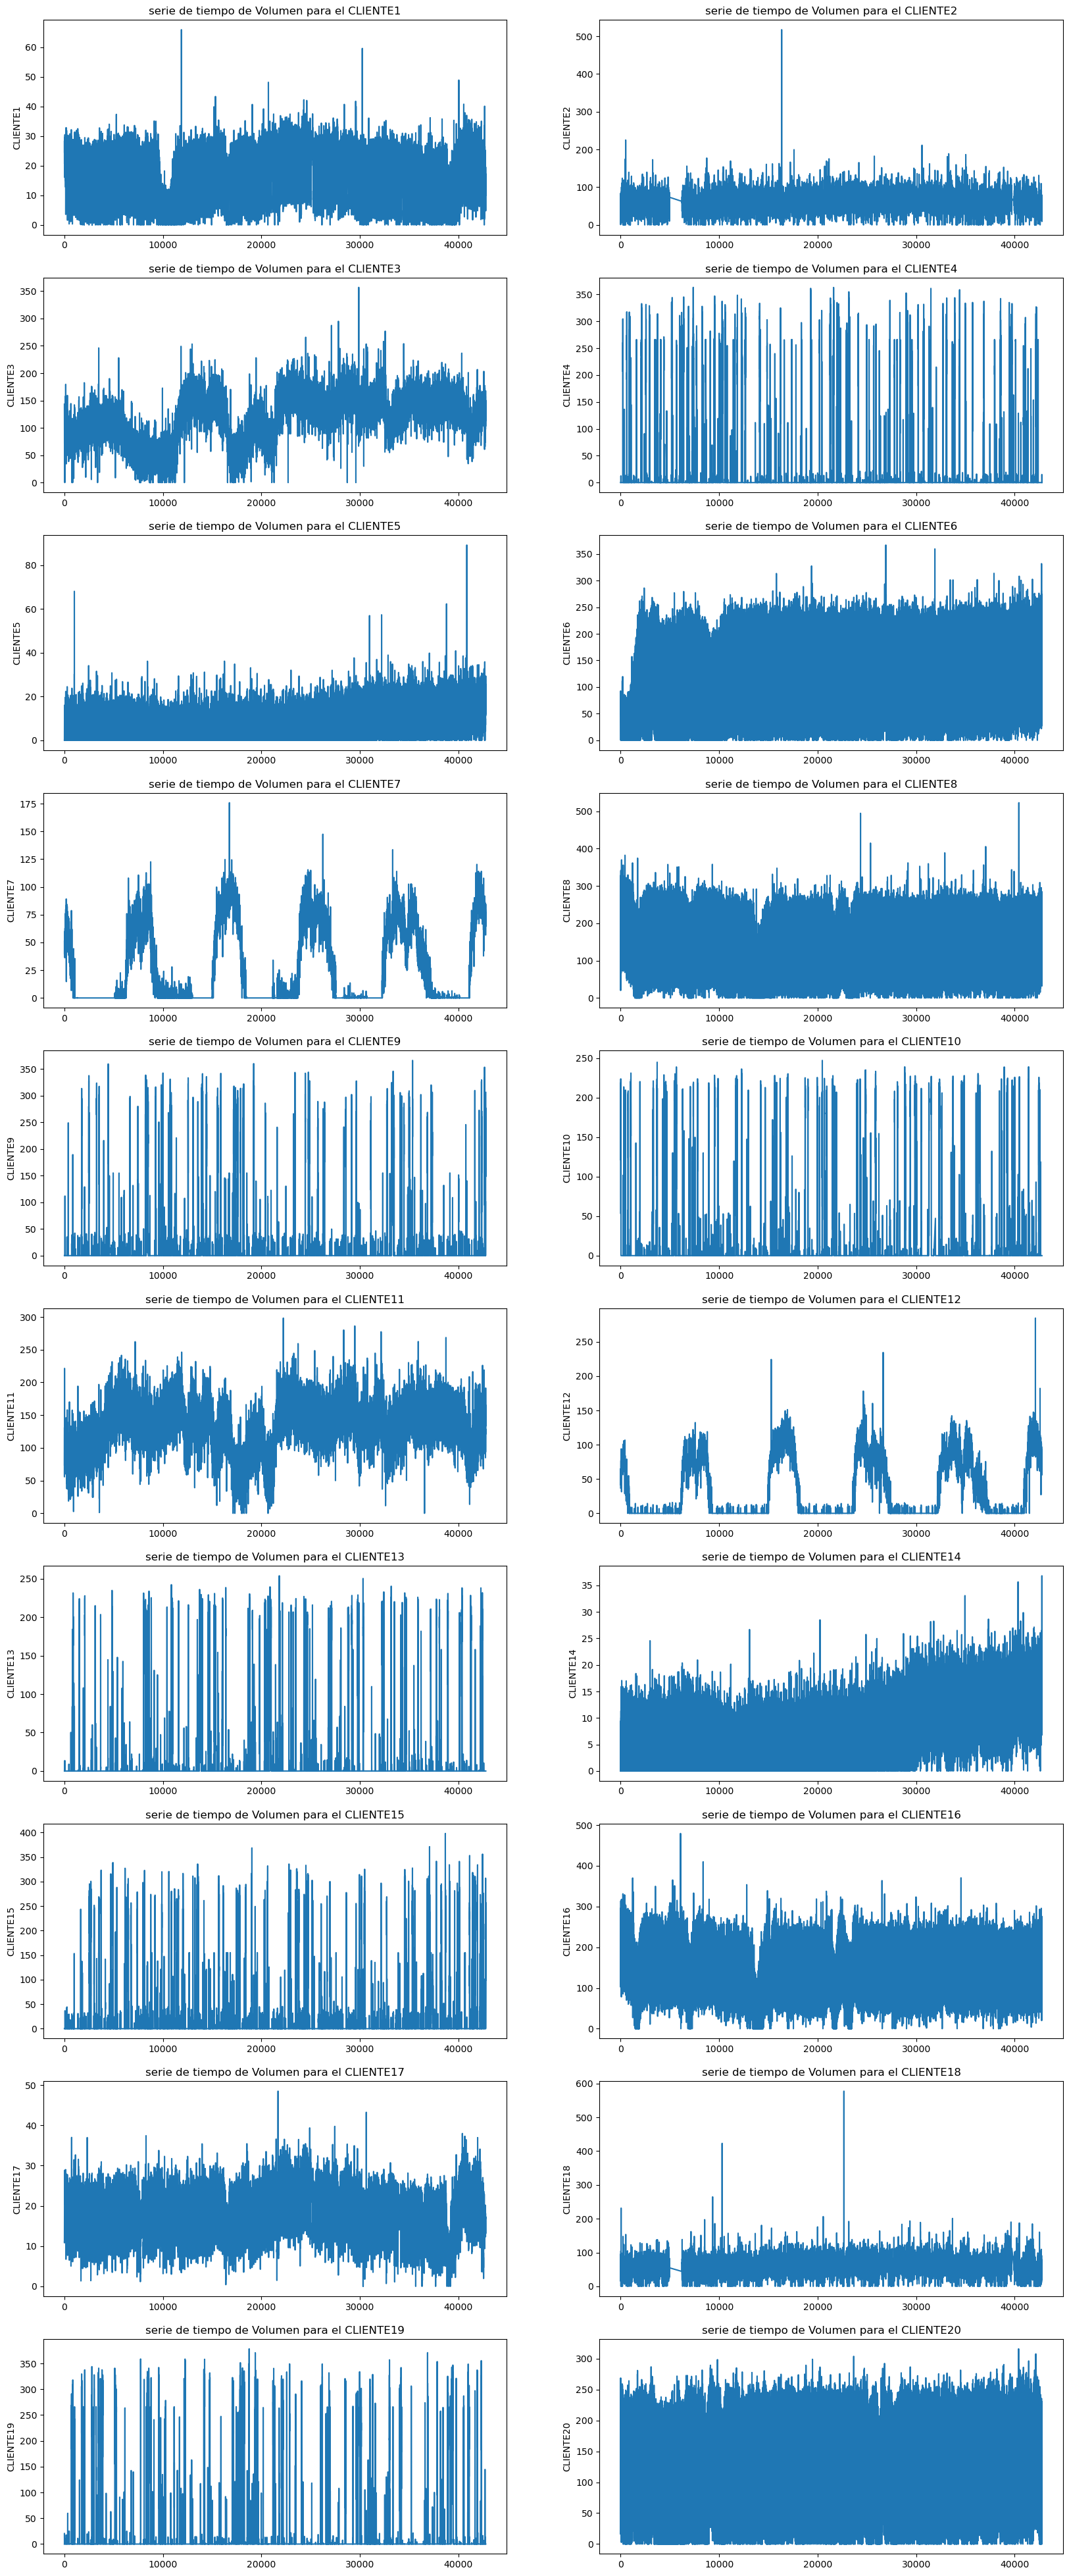

In [30]:
describe_variable("Volumen")

# Nueva informacion

se extrae informacion de la fecha y se observan los datos bajo estas nuevas variables

In [60]:
variable = "Temperatura"
df_presion = df_total.groupby(["Fecha","cliente"])[[variable]].sum().reset_index().pivot(columns="cliente",index="Fecha",values=variable)

df_total_fecha_presion = pd.merge(df_datetime_list,df_presion, on="Fecha")
df_total_fecha_presion.head(2)

,Fecha,CLIENTE1,CLIENTE10,CLIENTE11,CLIENTE12,CLIENTE13,CLIENTE14,CLIENTE15,CLIENTE16,CLIENTE17,...,CLIENTE19,CLIENTE2,CLIENTE20,CLIENTE3,CLIENTE4,CLIENTE5,CLIENTE6,CLIENTE7,CLIENTE8,CLIENTE9
0,2019-02-14 00:00:00,29.558433,27.870444,29.230214,30.124387,26.332842,28.087751,29.590773,30.770945,28.159463,...,28.591413,29.915043,25.844268,28.513818,27.907539,24.77763,28.936245,28.332525,31.084215,26.300286
1,2019-02-14 01:00:00,28.983364,27.293392,28.996448,30.651318,27.089834,28.442339,29.867153,30.802126,28.102700,...,28.325125,29.828217,25.821122,28.461788,27.798968,25.33722,28.589206,28.065345,30.953082,25.665387


In [61]:
df_total_fecha_presion['dia'] = df_total_fecha_presion['Fecha'].dt.day  # Extract the date
df_total_fecha_presion['mes'] = df_total_fecha_presion['Fecha'].dt.month  # Extract the date
df_total_fecha_presion['hora'] = df_total_fecha_presion['Fecha'].dt.hour  # Extract the time
df_total_fecha_presion["dia_semana"] = df_total_fecha_presion['Fecha'].dt.day_name()  # Extract the time

df_total_fecha_presion.head(2)

,Fecha,CLIENTE1,CLIENTE10,CLIENTE11,CLIENTE12,CLIENTE13,CLIENTE14,CLIENTE15,CLIENTE16,CLIENTE17,...,CLIENTE4,CLIENTE5,CLIENTE6,CLIENTE7,CLIENTE8,CLIENTE9,dia,mes,hora,dia_semana
0,2019-02-14 00:00:00,29.558433,27.870444,29.230214,30.124387,26.332842,28.087751,29.590773,30.770945,28.159463,...,27.907539,24.77763,28.936245,28.332525,31.084215,26.300286,14,2,0,Thursday
1,2019-02-14 01:00:00,28.983364,27.293392,28.996448,30.651318,27.089834,28.442339,29.867153,30.802126,28.102700,...,27.798968,25.33722,28.589206,28.065345,30.953082,25.665387,14,2,1,Thursday


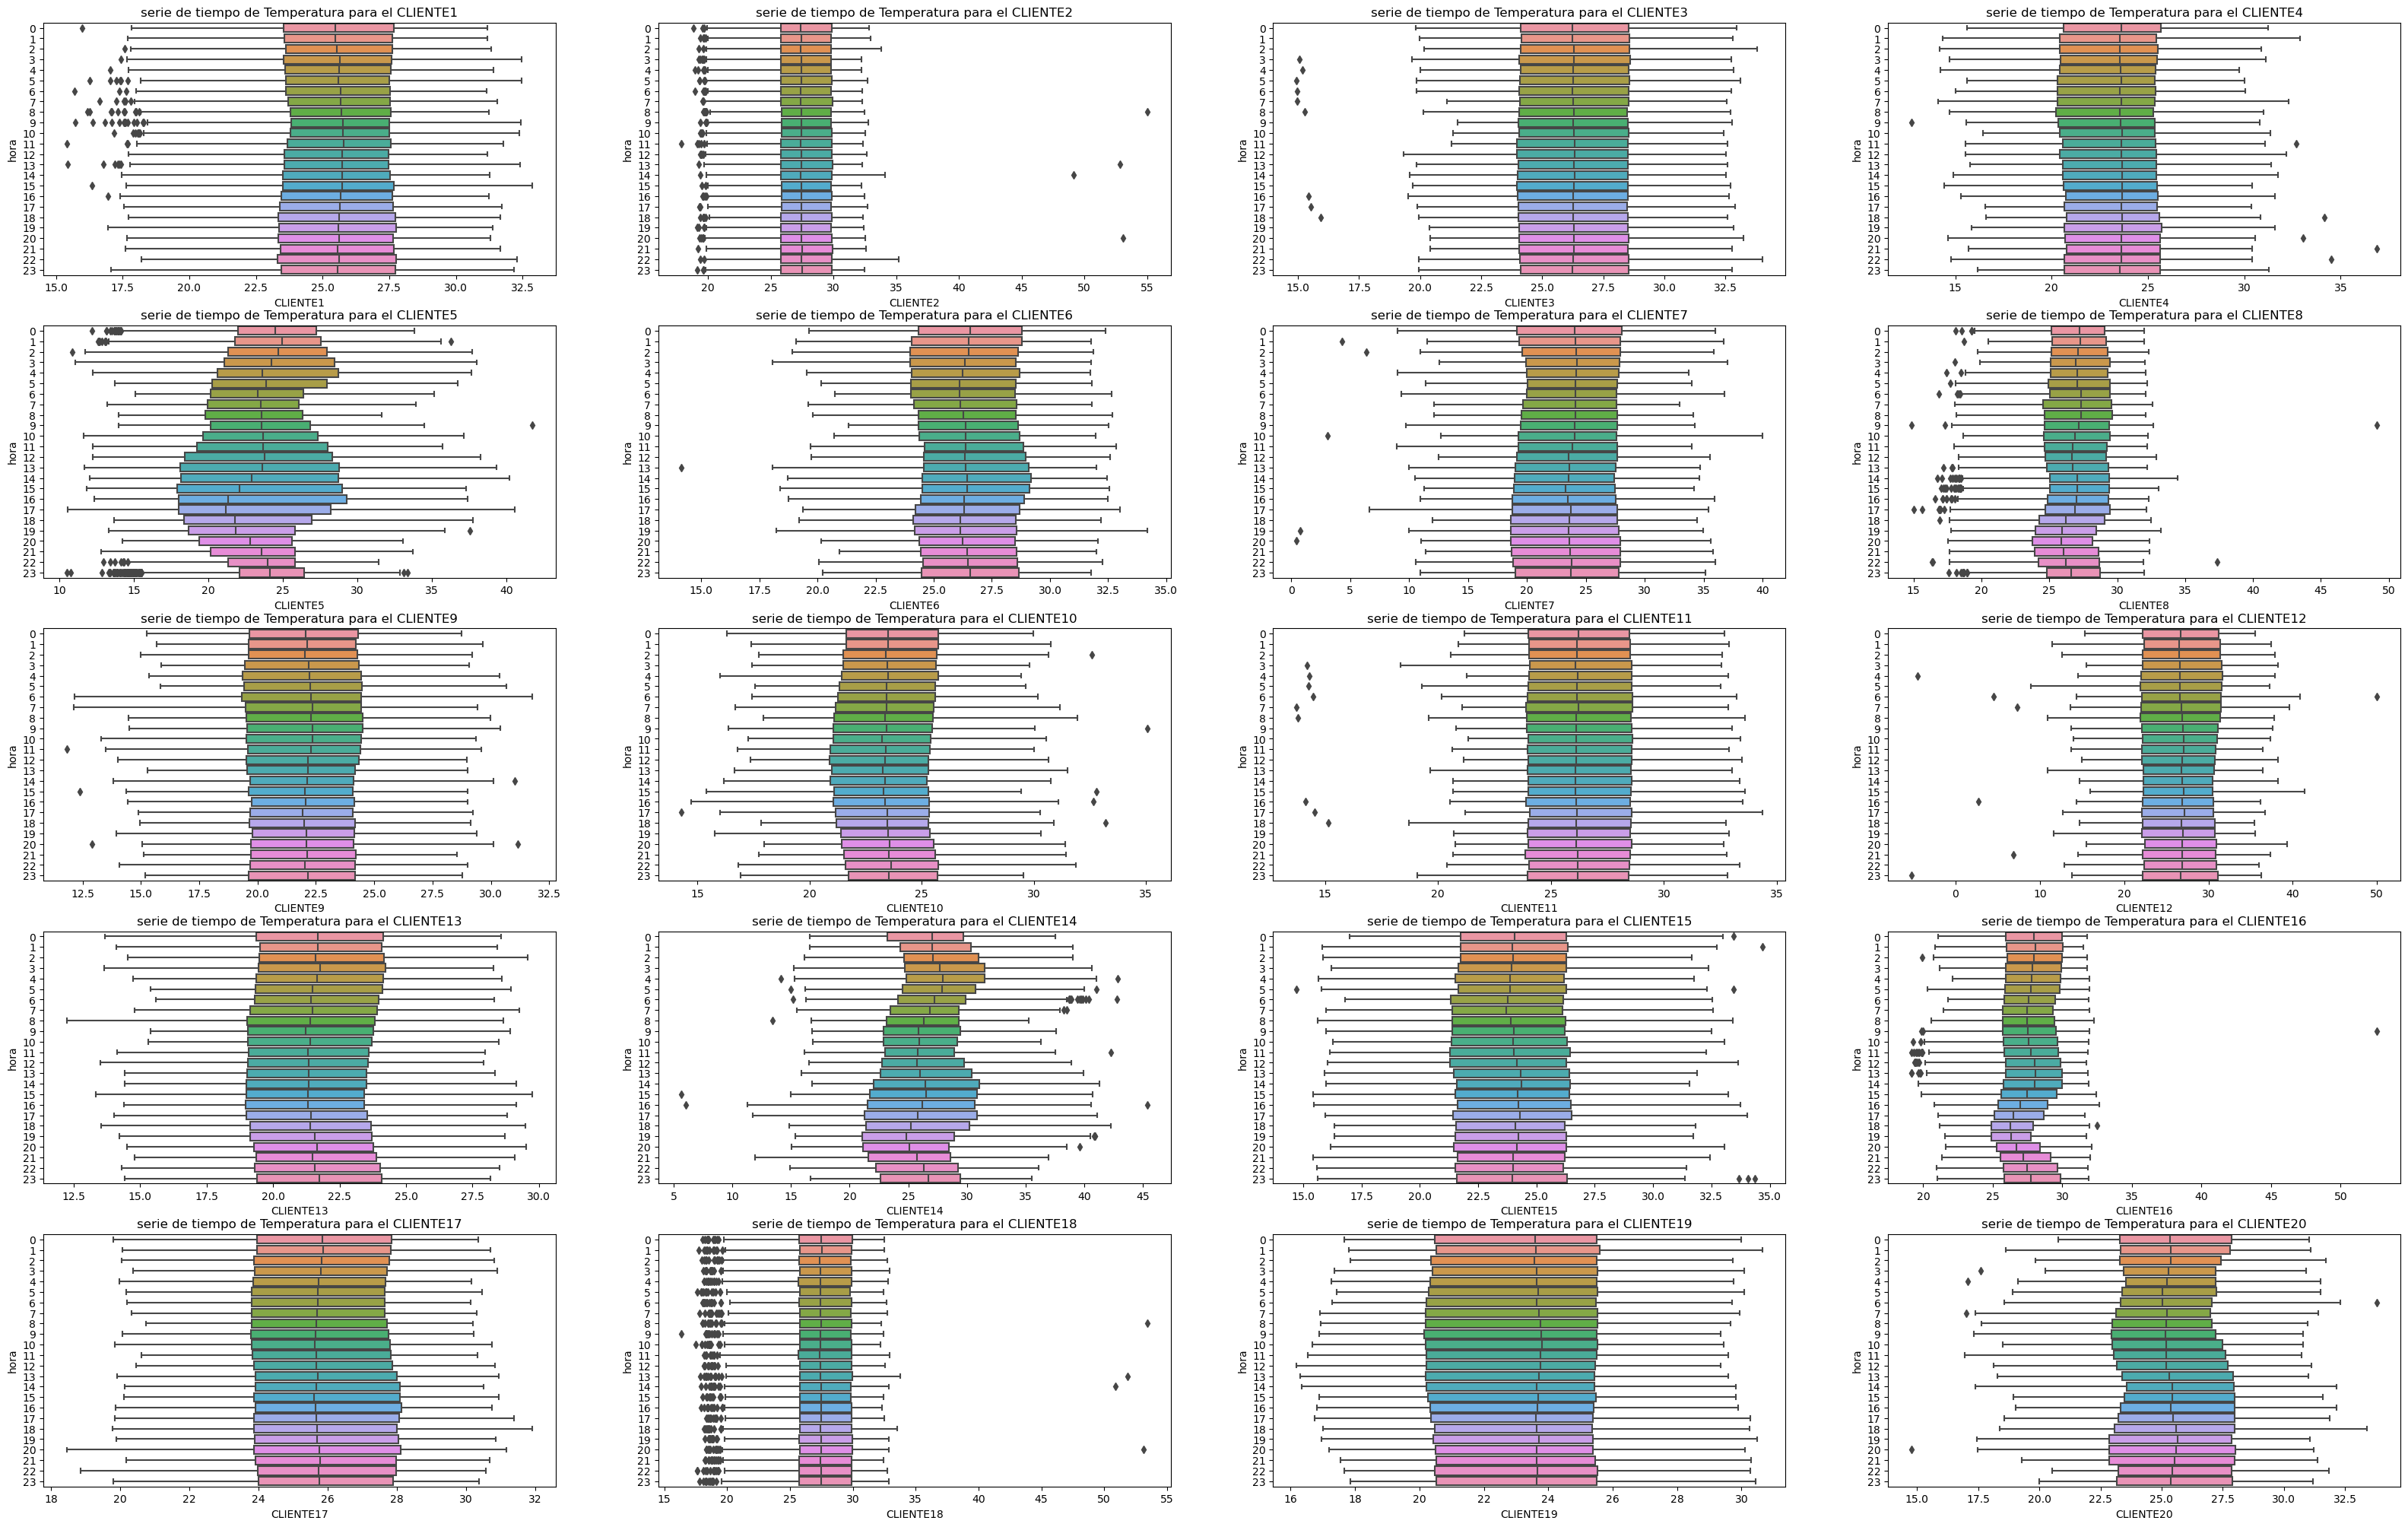

In [65]:
n_cols = 4
n_rows = int(np.ceil(len(cols_cliente)/n_cols))

fig, ax = plt.subplots(n_rows,n_cols, figsize=(n_cols*10, n_rows*5))
axs = ax.flatten()

for i, c in enumerate(cols_cliente):
    
    sns.boxplot(df_total_fecha_presion, x=c, y="hora", ax=axs[i],orient="h")
    axs[i].set_title("serie de tiempo de {var} para el {c}".format(var=variable, c=c))